In [6]:
# !pip install mecab-python3
# !pip install matplotlib
# !pip install japanize-matplotlib

import MeCab

def parse_neko(fname, fname_parsed):
    mecab = MeCab.Tagger()
    with open(fname,'r',encoding='utf-8') as f:
        data = f.read()
    
    with open(fname_parsed, mode='w',encoding='utf-8') as output:
        output.write(mecab.parse(data))
    return
 
fname = 'data/ch4/neko.txt'
fname_parsed = 'data/ch4/neko.txt.mecab'
parse_neko(fname, fname_parsed)

In [7]:
'''30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．
ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，
1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．'''

def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos

fname_parsed = 'data/ch4/neko.txt.mecab'
word_infos = neko_store(fname_parsed)
for i in range(3):
    print(word_infos[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生れ

In [7]:
'''31. 動詞
動詞の表層形をすべて抽出せよ
'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos

verbs = set()
fname_parsed = 'data/ch4/neko.txt.mecab'
lines = neko_store(fname_parsed)
for line in lines:
    for word_info in line:
        if word_info['pos'] == '動詞':
            verbs.add(word_info['surface'])

print('number of verb {}\n{}'.format(len(verbs),verbs))


number of verb 3892
{'曲る', 'かける', '心得', '祝し', 'きき', '消す', '生ぜ', '許さ', '盗ら', '慣れ', 'なさろ', '動かし', 'ふるえ', 'むけ', '払わ', 'せり出し', 'つけ', '雇っ', 'やってくる', '片付く', '奪っ', '売っ', '呼ば', '曲げ', '忍ばし', '織', '抛り出し', '跳ね返る', 'よら', '仰ぎ', 'いただか', 'きめ', '出来る', '休める', 'もがい', '鍛え上げ', 'やめよ', '寝かし', '迷っ', 'かくれる', '綻び', '兼ねる', '起し', '遣わし', '制さ', '栄える', '貪', '揉ん', 'おどる', '膨れ', 'なりすまし', '捨て', '渡る', '抱え込ん', 'むき出し', '乗る', '見詰める', 'わから', '滑り込む', '光り', '付か', '咽び', '送ら', '来よ', '蹴', '引っ掛け', '取れん', '食お', '飛びつく', '係わる', '困る', '握ろ', 'もたし', '取払う', 'すべれ', '流行り', 'あつかう', '着い', '延ばし', '垂らす', '守ら', '期す', '衒い', '飛び上がろ', 'つまり', '泣く', 'しる', '寄ら', '這い出そ', '弁ずる', '過ぎ去っ', 'ござる', '吹き', 'あげ', '読める', '噴き出し', 'もぐり込ん', '驚かさ', '除け', '貰う', '集っ', 'くっつい', '休み', '呑む', '消え去っ', 'いざっ', '見る', '頬張っ', '祟っ', 'だまっ', '歩き', '費やさ', 'ぱくつく', '終', '下がれ', 'そらす', '弱ら', '冷える', '名乗る', 'うむ', '負け', 'じらし', '滅する', '号する', '討と', '飛び降り', 'すわ', 'いりゃ', '為す', '素っ破抜く', 'はおら', '争う', '持て', '窺っ', '下さら', '渋り', '衰え', '湧き出る', 'おどし', '直る', 'てっ', '充たす', '仕ら', '打ち出し', '見つかれ', 'こし', '

In [8]:
'''32. 動詞の原形
動詞の原形をすべて抽出せよ．'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


verbs = set()
lines = neko_store(fname_parsed)
for line in lines:
    for word_info in line:
        if word_info['pos'] == '動詞':
            verbs.add(word_info['base'])

print('number of verb {}\n{}'.format(len(verbs),verbs))


number of verb 2298
{'措く', '曲る', 'かける', 'あたう', '見棄てる', 'あこがれる', '知れ渡る', '消す', '若く', 'かたちづくる', '使い分ける', 'はずれる', '塗りつける', 'はねる', 'やってくる', '片付く', '引ずる', 'うてる', 'つかまえる', '放り込む', '跳ね返る', '出来る', '休める', '歴る', '追い詰める', '取り極める', '仰る', 'かくれる', '引き付ける', '兼ねる', '申し渡す', '栄える', 'かすむ', 'おどる', '渡る', '満ちる', '乗る', '見詰める', '滑り込む', '念じる', '荒立てる', '交わす', '飛びつく', '係わる', '困る', 'やむを得る', 'あつかう', '切り抜く', '転じる', '期す', '垂らす', 'ござる', '狂わせる', '泣く', 'しる', '弁ずる', '契る', '読める', '突き合せる', '埋る', '貰う', '小突く', '生かす', '回る', 'まじる', '開け放つ', 'ちゃう', '呑む', 'はちきれる', '見る', 'すくう', 'あびる', 'ぱくつく', 'そらす', '冷える', '名乗る', 'さておく', 'うむ', '生やす', '滅する', '号する', '為す', '静まり返る', '素っ破抜く', '無くなる', '争う', '湧き出る', '直る', '充たす', 'つづく', 'うける', '思いやる', '申す', '盛る', '吸う', 'たつ', '解する', 'からまる', 'してやる', 'しまう', '暴く', '付く', '組み合せる', 'だす', '断わる', '呼びつける', '沿う', '弱る', '足りる', '後れる', 'たる', 'まじなう', 'つかまる', 'まする', '達する', 'ひっくり返る', '取れる', '逃げる', '参らせる', 'かねる', 'がかる', '画く', '動かす', '書き散らす', '滑らす', '砕く', '来る', '汚れる', 'さげる', '戒める', '放つ', '見当る', '切り抜ける', '散る', '窶す', '剥く', '

In [9]:
'''33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


lines = neko_store(fname_parsed)
list_a_and_b = []

for line in lines:
    if len(line) < 2:
        continue
    for i in range(1,len(line)-1):
        if line[i-1]['pos'] == "名詞" \
        and line[i]['surface'] == "の" \
        and line[i+1]['pos'] == "名詞":
            list_a_and_b.append(line[i-1]['surface'] + "の" + line[i+1]['surface'])
        
a_and_b = set(list_a_and_b)
print('number of a no b {}\n{}'.format(len(a_and_b),a_and_b))

number of a no b 4927
{'棺の中', 'さんの悪口', '竹のよう', '自己の力量', '一両日の後', '自分の顔', '何等の責任', 'こっちの手', '学校の恥辱', '例の人', '一掬の涙', '方のため', '一種の因果', '麩のよう', '息の穴', '居士の墓', 'うちの猫', '将来の趨勢', 'さの球', '迷亭の鋭鋒', '時代の遺物', '大学の教師', '先刻のよう', '一流の喩', '彼の今日', '狼狽の気味', '嬢の鼻', '新道の二絃琴', '国民の歓喜', '発展の結果', '衣食の途', '足の皮', '無地の袴', '竜頭蛇尾の挨拶', '白髪のチョン', 'さんの事', '逆上の天才', '多くの経験', '首縊りの生理', '秋の夜長', '君の写生', '妹の耳', '館の生徒', '端の待合', '僕の間柄', '手の付け', '多年の習慣', '罵詈の言語', '様の前', '顔の真中', '仲間のうち', '大学の講義', '教師のうち', '葉のよう', '裸のまま', 'いずれの時', '輪の花', '主人の一', '大勢の侍従', '胡乱の言辞', '吾輩の運動', '狼藉の練', '僕の向う', '内の日本堤', '最後の一', '股の所', '詰の談判', '珍客の事', '恋の詩', '活版の睡眠', '半の甲', '団栗のスタビリチー', '君の碁', '君の座敷', 'さのあまり', '人の子供', '君の留守', '妹の質問', '豪のもの', '色の口', '書物の表紙', '一の目的', '純粋の模', '六の背', '孔雀の料理', '女の品行', '頃のよう', '車夫の声', '世紀の人間', '案の眼', '生者必滅の道', '何のため', '本の間', '隊の砲手', '運動の変化', '先生の頭', '彼の元気', '竹の皮', '令嬢の前', '静坐の工夫', '辺の逸事', '元の杢', 'だらけの英文', '針の目', '日の日記', '下女の考え', '人の天文学', '竹垣の事', '斯産の猫', '以外の状態', '金田の奥さん', '湯上がりの顔', '人間の古物', 'ヴァイオリンの古物', '溜りの中', '教師の身', '鏡の前

In [10]:
'''34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


lines = neko_store(fname_parsed)

list_longest_noun = []
for line in lines:
    list_noun = []
    for i in range(len(line)):
        if line[i]['pos'] == "名詞":
            list_noun.append(line[i]['surface'])
        else:  # if next word is not noun, add noun appended in list_noun
            if len(list_noun) > 1:
                list_longest_noun.append("".join(list_noun))
            list_noun = []
    if len(list_noun) > 1: # if last word is noun
        list_longest_noun.append("".join(list_noun))
        
            
longest_noun = set(list_longest_noun)
print('number of longest a no b {}\n{}'.format(len(longest_noun),longest_noun))

number of a no b 4493
{'通り将軍家', '一個', '夜間外出', '十行内外', '風船玉', '古史伝説', '勇猛心', '父母未生以前', '御台所', '一般猫児', '牧山様', '外濠線', '布衍', '上瞼', '猫一疋', '膳椀皿小鉢', '通り今日', '伊勢源', '友某', '独逸皇帝陛下', '自信致候', '一そう', 'いくら中学校', '玉人', 'ホホホ口', 'め念', '二三ページ', 'なあにこれ', '——浅草警察署', '後ろ向', '恃みたいもの', '東風子', '現象世界', '君羅甸語', '十七味調唐辛子調', '終夜顫えつ', '大死一番乾坤新', '座敷中', '大方熊', '欠伸交', '二枚', '——なあに君', '何とか峠', '表章', '三女子', 'ざる問題', '君の', '突ッ', '定業', '自殺者', '四口', '鴻溝', '鴻雁', '慢性結膜炎', '章魚同然手', '二杯目', '粗末簡便', '大分苦心', '鼻恋', '冷暖', '金田富子嬢', '——甘木さん', '横ッ腹', '一つ穴', '湯加減', '肺病やみ', 'ため外出', 'るいの', '胃嚢', 'せんだって東北凶作', '万年漬', '秀才水島寒月', '吾等猫', '物指', '博士夫人', '技倆', 'まま細君', '十二三年以前', '十二人', '一遍', '気兼', '隣町', '際諸君', '写生なんざ出', '妙詩', '紋付羽織', '左甚五郎', '是非共眼', '椀底', '二三日朝飯', '何匹', '朝夕虎皮', '間毎月十円', '二分の一', '幕無し', '君方', '時ただ今', '午後二時頃', '——人間', '巻煙草入れ', '黒木綿', '二六時中太平', '一結杳然', '自弁休養', '一大凱旋祝賀会', '神経衰弱以前', '際吾輩', '橡面坊', '俳諧趣味', '四つ目', '二年越し', '眼鼻', '亜典', '十四世紀頃', '審美学協会', '現実界', '九冊分', '近く足音', 'トイフェルスドレック君', '当局者', '日本堤分署', '賤業婦', '一匹', '幾皿', '勢暴威', '名人理学士水島寒

In [8]:
# 35. 単語の出現頻度
# 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．
from collections import Counter

def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


lines = neko_store(fname_parsed)

words = []
for line in lines:
    for i in line:
        words.append(i['surface'])
        
for i in (Counter(words).most_common()):
    print(i)

('の', 9194)
('。', 7486)
('て', 6873)
('、', 6772)
('は', 6422)
('に', 6268)
('を', 6071)
('と', 5515)
('が', 5339)
('た', 3989)
('で', 3813)
('「', 3231)
('」', 3225)
('も', 2479)
('ない', 2391)
('だ', 2367)
('し', 2328)
('から', 2043)
('ある', 1730)
('な', 1612)
('ん', 1568)
('か', 1531)
('いる', 1251)
('事', 1207)
('へ', 1034)
('する', 998)
('う', 992)
('もの', 981)
('君', 973)
('です', 973)
('云う', 937)
('主人', 932)
('よう', 697)
('ね', 683)
('この', 649)
('御', 636)
('ば', 617)
('人', 602)
('その', 576)
('一', 554)
('そう', 554)
('何', 539)
('なる', 531)
('さ', 513)
('よ', 509)
('なら', 483)
('吾輩', 481)
('い', 477)
('ます', 458)
('じゃ', 448)
('…', 433)
('これ', 414)
('\u3000', 411)
('なっ', 404)
('それ', 395)
('来', 364)
('れ', 356)
('見', 350)
('でも', 345)
('時', 344)
('迷亭', 343)
('ませ', 330)
('いい', 320)
('——', 319)
('ところ', 315)
('まで', 313)
('方', 312)
('三', 311)
('二', 302)
('ず', 299)
('上', 294)
('まし', 289)
('寒月', 286)
('顔', 282)
('ぬ', 277)
('先生', 274)
('見る', 273)
('人間', 272)
('だろ', 270)
('くらい', 269)
('僕', 268)
('たら', 264)
('さん', 260)
('なく', 258)
('気', 

('沢庵', 5)
('バルザック', 5)
('看板', 5)
('拍', 5)
('身の上', 5)
('境遇', 5)
('釜', 5)
('食お', 5)
('くれれ', 5)
('煩悶', 5)
('やん', 5)
('要するに', 5)
('倒れ', 5)
('仰せ', 5)
('苦しく', 5)
('やめる', 5)
('どっか', 5)
('起さ', 5)
('堅く', 5)
('朋友', 5)
('行儀', 5)
('光り', 5)
('下りる', 5)
('かさん', 5)
('すっ', 5)
('踊り', 5)
('了解', 5)
('詩的', 5)
('手持無沙汰', 5)
('怒鳴る', 5)
('顋', 5)
('合図', 5)
('投', 5)
('詞', 5)
('斤', 5)
('誂え', 5)
('分け', 5)
('着け', 5)
('圧し', 5)
('洒落', 5)
('うそ', 5)
('ほんの', 5)
('挟む', 5)
('ボー', 5)
('もらう', 5)
('たかっ', 5)
('懐', 5)
('まことに', 5)
('続け', 5)
('伺っ', 5)
('芝居', 5)
('掠め', 5)
('遣手', 5)
('見番', 5)
('調べ', 5)
('見上げ', 5)
('わっ', 5)
('ごろごろ', 5)
('現今', 5)
('責任', 5)
('姓名', 5)
('ぼ', 5)
('新年', 5)
('同意', 5)
('鳥', 5)
('園', 5)
('見受け', 5)
('感謝', 5)
('流行', 5)
('皇', 5)
('図', 5)
('遠から', 5)
('済む', 5)
('案出', 5)
('廿', 5)
('国民', 5)
('於', 5)
('障る', 5)
('仕', 5)
('便宜', 5)
('仕舞', 5)
('本気', 5)
('隠れ', 5)
('診察', 5)
('ほんに', 5)
('使え', 5)
('洗う', 5)
('休み', 5)
('維新', 5)
('蒙っ', 5)
('さぞ', 5)
('開く', 5)
('問う', 5)
('泰然', 5)
('伎倆', 5)
('断り', 5)
('ずっと', 5)
('行徳', 5)
('ほっと',

('安置', 2)
('尠', 2)
('城', 2)
('偵察', 2)
('不公平', 2)
('叩きつける', 2)
('寄寓', 2)
('冒険', 2)
('義侠', 2)
('畳み込ん', 2)
('躁狂', 2)
('中庸', 2)
('軒下', 2)
('煩', 2)
('及ぼし', 2)
('精進', 2)
('見届け', 2)
('土中', 2)
('白雨', 2)
('人道', 2)
('無駄骨', 2)
('汚す', 2)
('舌頭', 2)
('与', 2)
('続々', 2)
('占領', 2)
('傲慢', 2)
('漆喰', 2)
('土間', 2)
('焚き', 2)
('界隈', 2)
('あな', 2)
('てりゃ', 2)
('恐れる', 2)
('唐変木', 2)
('威嚇', 2)
('歩い', 2)
('妙味', 2)
('冷', 2)
('暖', 2)
('掉', 2)
('堪能', 2)
('満天下', 2)
('大明神', 2)
('天地玄黄', 2)
('収める', 2)
('び', 2)
('くらむ', 2)
('滅茶苦茶', 2)
('懲らしめ', 2)
('津', 2)
('ピン', 2)
('福地', 2)
('揃っ', 2)
('跳', 2)
('返り', 2)
('推す', 2)
('代物', 2)
('祭り', 2)
('鼻息', 2)
('綜合', 2)
('鶉', 2)
('毎度', 2)
('贔屓', 2)
('あずかり', 2)
('食わせる', 2)
('束髪', 2)
('行李', 2)
('遊ばし', 2)
('上げよ', 2)
('にくらしい', 2)
('集め', 2)
('日当り', 2)
('山の上', 2)
('奪わ', 2)
('蜂の巣', 2)
('胡坐', 2)
('他言', 2)
('紫色', 2)
('長州', 2)
('征伐', 2)
('博物館', 2)
('旗本', 2)
('茶人', 2)
('乾', 2)
('清浄', 2)
('毒々しい', 2)
('親愛', 2)
('わいわい', 2)
('ワハハハハハ', 2)
('立ち上っ', 2)
('必用', 2)
('抓ん', 2)
('愚見', 2)
('かむ', 2)
('蓄積', 2)
('原則', 

('持ち上げる', 1)
('緩やか', 1)
('高名', 1)
('尊顔', 1)
('蹶', 1)
('ガタリ', 1)
('刷毛', 1)
('擦', 1)
('挟ま', 1)
('マチ', 1)
('擦る', 1)
('夜陰', 1)
('水車', 1)
('効用', 1)
('急所', 1)
('おびただしい', 1)
('起こそ', 1)
('渋り', 1)
('覚める', 1)
('ミチリミチリ', 1)
('近づい', 1)
('已', 1)
('凝らし', 1)
('二度と', 1)
('悟', 1)
('桟', 1)
('透し', 1)
('濃く', 1)
('消える', 1)
('縮まる', 1)
('飛出', 1)
('待ち兼ね', 1)
('不時', 1)
('卑見', 1)
('慮', 1)
('耶蘇教', 1)
('天地開闢', 1)
('更', 1)
('叩き込み', 1)
('万有', 1)
('聖書', 1)
('玄妙', 1)
('承認', 1)
('世界中', 1)
('作り上げ', 1)
('画工', 1)
('精力', 1)
('消耗', 1)
('推せ', 1)
('一手', 1)
('負っ', 1)
('当初', 1)
('損ね', 1)
('判ぜ', 1)
('呑ま', 1)
('寸分', 1)
('聖母', 1)
('マドンナ', 1)
('双幅', 1)
('見せろ', 1)
('弘法大師', 1)
('空海', 1)
('書体', 1)
('伝習', 1)
('乳母', 1)
('習う', 1)
('発音', 1)
('至難', 1)
('悉皆', 1)
('焼印', 1)
('表明', 1)
('さして', 1)
('目まぐるしき', 1)
('瞥見', 1)
('感想', 1)
('湧き出', 1)
('打ち消す', 1)
('眉目', 1)
('一銭', 1)
('銅貨', 1)
('浅黒い', 1)
('目する', 1)
('さては', 1)
('別人', 1)
('小切手', 1)
('称せ', 1)
('熱度', 1)
('惚れ込ま', 1)
('早分り', 1)
('良縁', 1)
('破れる', 1)
('健在', 1)
('要件', 1)
('半纏', 1)
('納戸', 1)
('博多',

('古城', 1)
('仙石', 1)
('喰代', 1)
('順に', 1)
('尾張', 1)
('名古屋', 1)
('鯱', 1)
('じれった', 1)
('楽器', 1)
('金子', 1)
('兵衛', 1)
('ともっ', 1)
('難渋', 1)
('予防線', 1)
('くり', 1)
('丸み', 1)
('つよく', 1)
('琴線', 1)
('映り', 1)
('ふ', 1)
('買お', 1)
('留まり', 1)
('党', 1)
('クラス', 1)
('溜まっ', 1)
('柔道', 1)
('ついと', 1)
('古ぼけ', 1)
('洋書', 1)
('聴手', 1)
('真夜中', 1)
('水泡', 1)
('むずかしかろ', 1)
('見積っ', 1)
('咎める', 1)
('ぶらぶら', 1)
('経っ', 1)
('たつ', 1)
('つらき', 1)
('置炬燵', 1)
('吊ら', 1)
('つらかっ', 1)
('うろうろ', 1)
('まごつい', 1)
('累々', 1)
('喪家', 1)
('騎', 1)
('鷹匠', 1)
('県庁', 1)
('枯柳', 1)
('渡り', 1)
('川添', 1)
('川端', 1)
('落人', 1)
('生れれ', 1)
('目貫', 1)
('大戸', 1)
('潜り戸', 1)
('永い', 1)
('大半', 1)
('若僧', 1)
('拵', 1)
('堪り', 1)
('響け', 1)
('詩吟', 1)
('王師', 1)
('はん', 1)
('木村', 1)
('夜通し', 1)
('道中双六', 1)
('序幕', 1)
('こん度', 1)
('掘り出す', 1)
('戸袋', 1)
('隠れ家', 1)
('手ひどい', 1)
('危機一髪', 1)
('安宅', 1)
('情けなく', 1)
('取り残さ', 1)
('餞別', 1)
('造詣', 1)
('つき合わ', 1)
('やれん', 1)
('木槿', 1)
('頭領', 1)
('督', 1)
('造る', 1)
('音曲', 1)
('御寺', 1)
('日藤', 1)
('発覚', 1)
('はれ', 1)
('ふっ', 1)
('哄然', 1)
('機外', 1

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']


<BarContainer object of 10 artists>

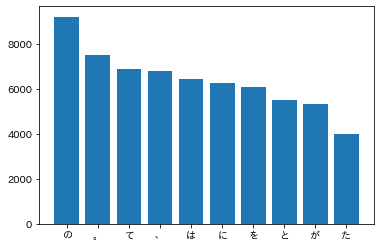

In [12]:
'''36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．'''

import matplotlib.pyplot as plt
import japanize_matplotlib


most_common_ten = Counter(words).most_common(10)
ten_words = [most_common_ten[i][0] for i in range(len(most_common_ten))]
ten_freq = [most_common_ten[i][1] for i in range(len(most_common_ten))]

plt.bar(ten_words, ten_freq, width=0.8)


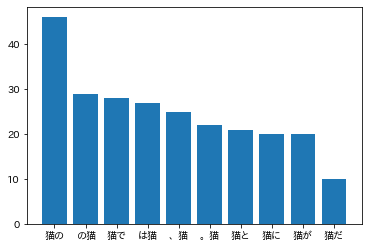

['猫である', '、猫の', '吾輩は猫', '猫といえ', 'は猫で', 'が、猫', '。猫の', 'の猫で', '吾等猫', '猫だから']


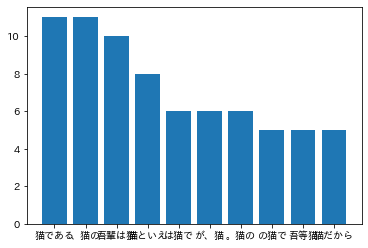

In [99]:
'''37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
'''
import matplotlib.pyplot as plt
import japanize_matplotlib

def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


words = []
lines = neko_store(fname_parsed)
for line in lines:
    for word_info in line:
            words.append(word_info['surface'])

def find_ngrams(input_list, n): 
    return zip(*[input_list[i:] for i in range(n)])

bi_word = find_ngrams(words,2)
bi_neko = [i for i in bi_word if '猫' in i]
most_common_ten = Counter(bi_neko).most_common(10)


ten_words = ["".join(most_common_ten[i][0]) for i in range(len(most_common_ten))]
ten_freq = [most_common_ten[i][1] for i in range(len(most_common_ten))]

plt.bar(ten_words, ten_freq, width=0.8)
plt.show()

tri_word = find_ngrams(words,3)
tri_neko = [i for i in tri_word if '猫' in i]
most_common_ten = Counter(tri_neko).most_common(10)

ten_words = ["".join(most_common_ten[i][0]) for i in range(len(most_common_ten))]
ten_freq = [most_common_ten[i][1] for i in range(len(most_common_ten))]


plt.bar(ten_words, ten_freq, width=0.8)
print(ten_words)

Text(0, 0.5, 'words')

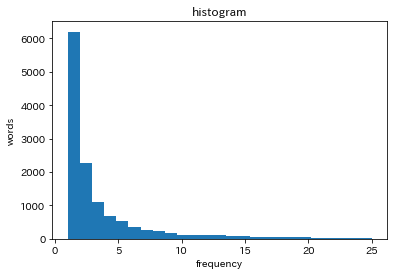

In [101]:
'''38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け'''
import matplotlib.pyplot as plt
import japanize_matplotlib


words = []
for line in lines:
    for i in line:
        words.append(i['surface'])
        
most_common_words = Counter(words).most_common()
freq = [most_common_words[i][1] for i in range(len(most_common_words))]


plt.hist(freq,bins=25,range=(1, 25))
plt.title("histogram")
plt.xlabel('frequency')
plt.ylabel('words')

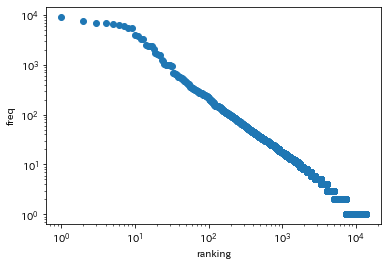

In [15]:
'''39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．'''
import matplotlib.pyplot as plt
import japanize_matplotlib


words = []
for line in lines:
    for i in line:
        words.append(i['surface'])
        
most_common_words = Counter(words).most_common()
freq = [most_common_words[i][1] for i in range(len(most_common_words))]

plt.scatter(range(1, len(freq)+1),  freq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ranking')
plt.ylabel('freq')
plt.show()